In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
test=pd.read_csv("aug_test.csv")
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [6]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [8]:
test["gender"].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [9]:
test["gender"].value_counts()

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

In [10]:
test["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [11]:
test["relevent_experience"].value_counts()

Has relevent experience    1524
No relevent experience      605
Name: relevent_experience, dtype: int64

In [12]:
test['enrolled_university'].unique()

array(['Full time course', 'no_enrollment', 'Part time course', nan],
      dtype=object)

In [13]:
test['enrolled_university'].value_counts()

no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

In [14]:
test["enrolled_university"]=test["enrolled_university"].replace("no_enrollment","No enrollment")

In [15]:
test['enrolled_university'].value_counts()

No enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64

In [16]:
test['education_level'].unique()

array(['Graduate', 'High School', 'Masters', nan, 'Phd', 'Primary School'],
      dtype=object)

In [17]:
test['education_level'].value_counts()

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [18]:
test['major_discipline'].unique()

array(['STEM', nan, 'Other', 'Business Degree', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [19]:
test['major_discipline'].value_counts()

STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [20]:
test["experience"].unique()

array(['9', '5', '<1', '11', '>20', '10', '14', '3', '20', '8', '4', '13',
       '2', '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [21]:
test["experience"].value_counts()

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [22]:
def replace(experience):
    if experience == '>20':
        return 21
    elif experience == '<1':
        return 0

    else:
        return experience
test["Experience"]= test["experience"].apply(replace)    

In [23]:
test["Experience"].unique()

array(['9', '5', 0, '11', 21, '10', '14', '3', '20', '8', '4', '13', '2',
       '6', '7', '1', '19', '15', '16', nan, '17', '18', '12'],
      dtype=object)

In [24]:
test["Experience"].value_counts()

21    383
5     163
3     154
4     145
6     130
2     128
7     116
9     113
10     96
11     86
8      82
0      74
16     68
15     59
1      56
14     55
13     54
12     52
17     36
19     29
18     26
20     19
Name: Experience, dtype: int64

In [25]:
del test['experience']

In [26]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,Experience
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,<10,NaN,1,21,9
1,9858,city_103,0.920,Female,Has relevent experience,No enrollment,Graduate,STEM,NaN,Pvt Ltd,1,98,5
2,31806,city_21,0.624,Male,No relevent experience,No enrollment,High School,NaN,NaN,Pvt Ltd,never,15,0
3,27385,city_13,0.827,Male,Has relevent experience,No enrollment,Masters,STEM,10/49,Pvt Ltd,1,39,11
4,27724,city_103,0.920,Male,Has relevent experience,No enrollment,Graduate,STEM,10000+,Pvt Ltd,>4,72,21


In [27]:
test["company_size"].unique()

array(['<10', nan, '10/49', '10000+', '100-500', '50-99', '1000-4999',
       '500-999', '5000-9999'], dtype=object)

In [28]:
test["company_size"].value_counts()

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [29]:
test["Company_Size"]=test["company_size"].replace(["50-99","100-500","10/49","<10","1000-4999","500-999","5000-9999","10000+"],[75,250,30,8,2500,750,7500,10500])

In [30]:
test["Company_Size"].value_counts()

75.0       338
250.0      318
10500.0    217
30.0       172
8.0        163
2500.0     143
750.0       88
7500.0      68
Name: Company_Size, dtype: int64

In [31]:
del test['company_size']

In [32]:
test['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Other', 'Public Sector',
       'Early Stage Startup', 'NGO'], dtype=object)

In [33]:
test['company_type'].value_counts()

Pvt Ltd                1141
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [34]:
test['last_new_job'].unique()

array(['1', 'never', '>4', '2', '4', '3', nan], dtype=object)

In [35]:
test['last_new_job'].value_counts()

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64

In [36]:
test['Last_new_job']=test['last_new_job'].replace(["never",">4"],[0,5])

In [37]:
test['Last_new_job'].value_counts()

1    884
5    353
2    342
0    258
3    133
4    119
Name: Last_new_job, dtype: int64

In [38]:
del test['last_new_job']

In [39]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,training_hours,Experience,Company_Size,Last_new_job
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,NaN,21,9,8.0,1
1,9858,city_103,0.920,Female,Has relevent experience,No enrollment,Graduate,STEM,Pvt Ltd,98,5,NaN,1
2,31806,city_21,0.624,Male,No relevent experience,No enrollment,High School,NaN,Pvt Ltd,15,0,NaN,0
3,27385,city_13,0.827,Male,Has relevent experience,No enrollment,Masters,STEM,Pvt Ltd,39,11,30.0,1
4,27724,city_103,0.920,Male,Has relevent experience,No enrollment,Graduate,STEM,Pvt Ltd,72,21,10500.0,5


In [1]:
test.to_csv("HR ANALYTICS CLEANED(test).csv")

NameError: name 'test' is not defined

<AxesSubplot:>

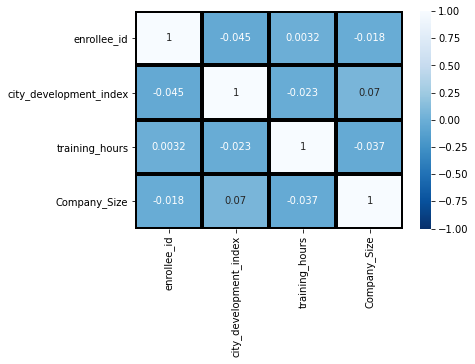

In [40]:
sns.heatmap(test.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'Blues_r', linewidths=3, linecolor='black')

In [41]:
pd.pivot_table(test, index = ['gender','relevent_experience'],values="training_hours")

training_hours
gender relevent_experience                    
Female Has relevent experience       58.706522
       No relevent experience        68.022222
Male   Has relevent experience       65.814414
       No relevent experience        65.708571
Other  Has relevent experience      102.230769
       No relevent experience        55.181818

In [42]:
pd.pivot_table(test, index = ['gender','relevent_experience'],values="Company_Size")

Company_Size
gender relevent_experience                  
Female Has relevent experience   2431.082192
       No relevent experience    3092.846154
Male   Has relevent experience   2164.102151
       No relevent experience    2397.926667
Other  Has relevent experience   1381.600000
       No relevent experience    2465.000000

In [43]:
pd.pivot_table(test, index = ['gender','enrolled_university'],values="Company_Size")

Company_Size
gender enrolled_university              
Female Full time course      3319.352941
       No enrollment         2431.743243
       Part time course      3061.428571
Male   Full time course      2065.439394
       No enrollment         2153.266129
       Part time course      3102.942029
Other  Full time course       250.000000
       No enrollment         2548.300000
       Part time course       102.000000

In [44]:
pd.pivot_table(test, index = ['gender','enrolled_university'],values="training_hours")

training_hours
gender enrolled_university                
Female Full time course          66.343750
       No enrollment             58.053191
       Part time course          86.700000
Male   Full time course          63.879377
       No enrollment             66.859890
       Part time course          56.776596
Other  Full time course          65.600000
       No enrollment             78.200000
       Part time course         108.750000

In [45]:
pd.pivot_table(test, index = ['gender','education_level'],values="training_hours")

training_hours
gender education_level                
Female Graduate              58.123711
       High School           39.166667
       Masters               85.076923
       Phd                   46.142857
       Primary School        54.000000
Male   Graduate              65.442263
       High School           64.044304
       Masters               65.367978
       Phd                   85.416667
       Primary School        74.550000
Other  Graduate              93.352941
       High School           19.500000
       Masters              148.000000
       Primary School        26.000000

In [46]:
pd.pivot_table(test, index = ['gender','education_level'],values="Company_Size")

Company_Size
gender education_level              
Female Graduate          2405.102941
       High School       6850.000000
       Masters           2601.409091
       Phd                941.666667
       Primary School      30.000000
Male   Graduate          2144.413273
       High School       1148.511905
       Masters           2683.145833
       Phd               2315.379310
       Primary School    2168.200000
Other  Graduate          2474.100000
       High School        162.500000
       Masters            750.000000

In [47]:
pd.pivot_table(test, index = ['gender','major_discipline'],values="Company_Size")

Company_Size
gender major_discipline              
Female Arts                243.750000
       Humanities         2711.000000
       Other              3171.000000
       STEM               2457.800000
Male   Arts               1105.900000
       Business Degree    1761.840000
       Humanities         2133.256410
       No Major           1247.266667
       Other              1142.000000
       STEM               2388.474227
Other  Humanities          861.000000
       STEM               2863.500000

In [48]:
pd.pivot_table(test, index = ['gender','major_discipline'],values="training_hours")

training_hours
gender major_discipline                
Female Arts                   95.250000
       Humanities             60.666667
       Other                  55.428571
       STEM                   62.481132
Male   Arts                   76.166667
       Business Degree        55.551724
       Humanities             60.057692
       No Major               53.722222
       Other                  73.043478
       STEM                   66.536064
Other  Humanities            157.666667
       No Major               78.000000
       STEM                   84.571429

In [49]:
pd.pivot_table(test, index = ['gender'],values="training_hours")

,training_hours
gender,
Female,61.766423
Male,65.789041
Other,80.666667


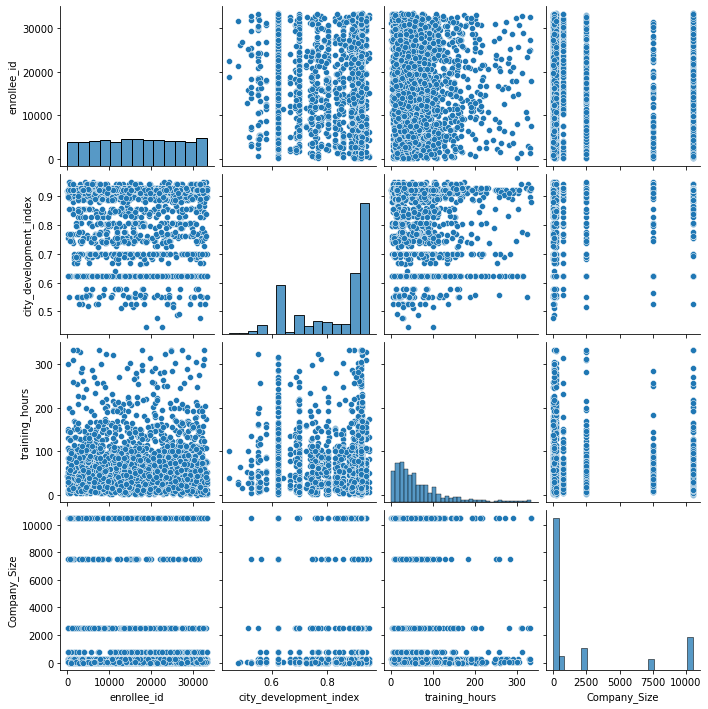

In [50]:
sns.pairplot(test)

In [51]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'company_type', 'training_hours', 'Experience',
       'Company_Size', 'Last_new_job'],
      dtype='object')

<ipython-input-52-b158dbc25fc8>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


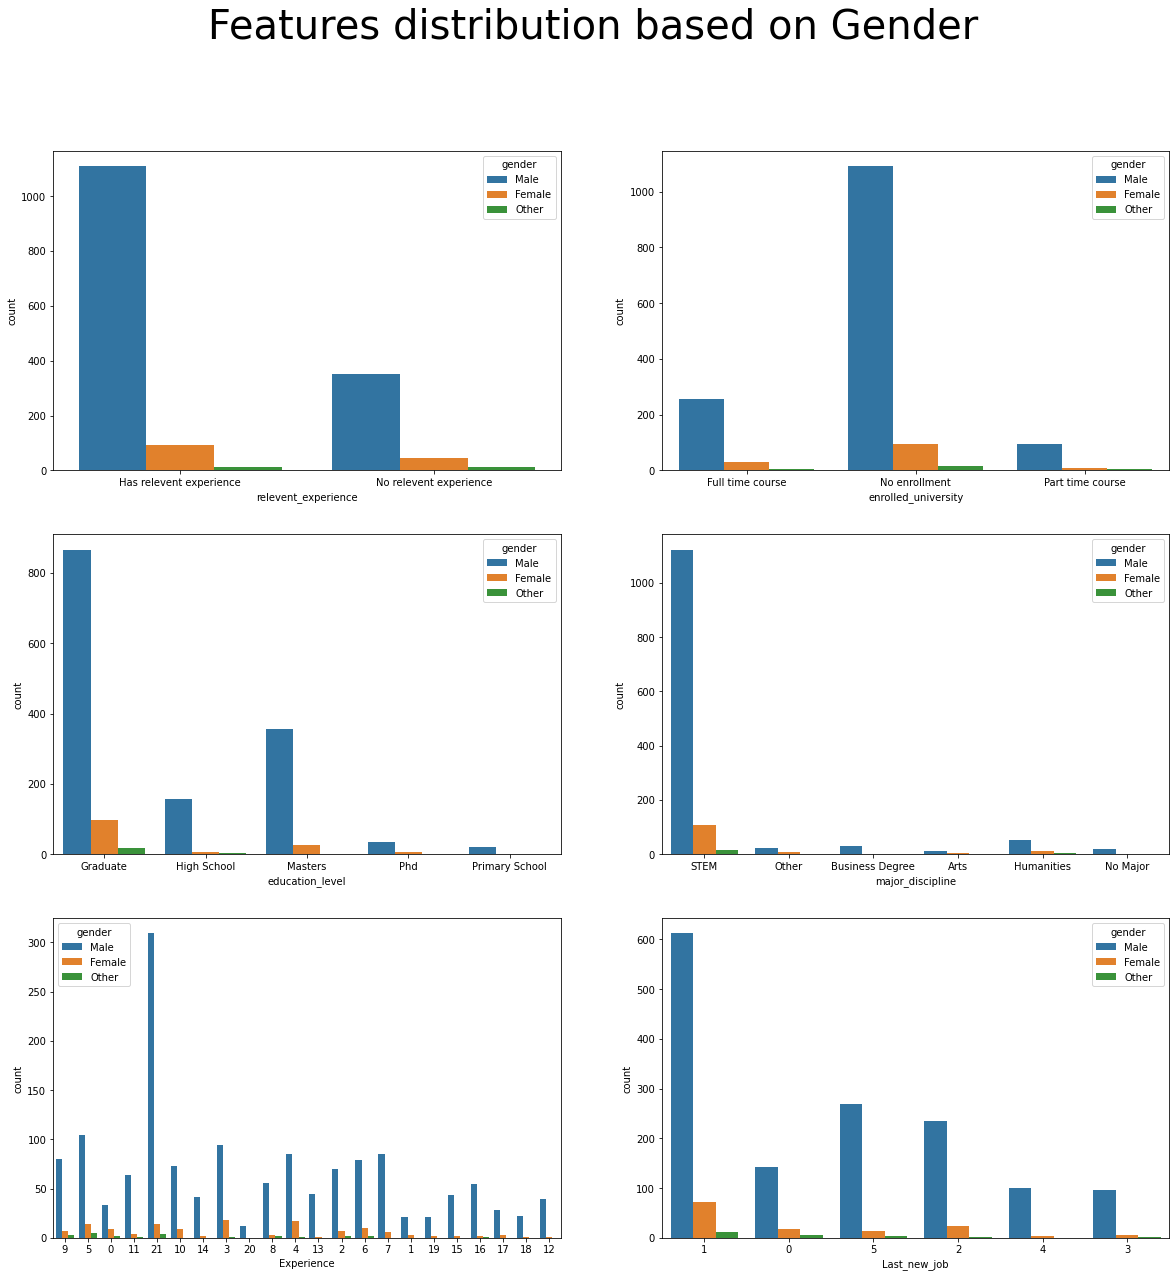

In [52]:
fig_dims = (20, 20)
fig, ax =plt.subplots(3,2,figsize = fig_dims)
sns.countplot(x=test["relevent_experience"],hue=test["gender"],ax=ax[0,0])
sns.countplot(x=test["enrolled_university"],hue=test["gender"],ax=ax[0,1])
sns.countplot(x=test["education_level"],hue=test["gender"],ax=ax[1,0])
sns.countplot(x=test["major_discipline"],hue=test["gender"],ax=ax[1,1])
sns.countplot(x=test["Experience"],hue=test["gender"],ax=ax[2,0])
sns.countplot(x=test["Last_new_job"],hue=test["gender"],ax=ax[2,1])
fig.suptitle('Features distribution based on Gender',fontsize=40)
fig.show()

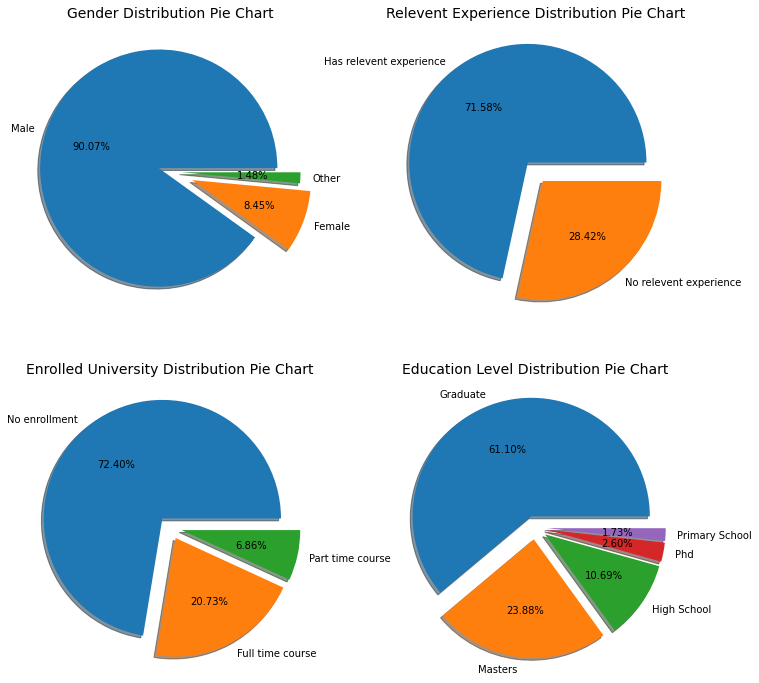

In [101]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = test['gender'].value_counts().index
values = test['gender'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True,explode=(0.1,0.2,0.1))
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = test['relevent_experience'].value_counts().index
values = test['relevent_experience'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True,explode=(0.1,0.1))
ax2.set_title("Relevent Experience Distribution Pie Chart", fontdict={'fontsize': 14})


labels = test['enrolled_university'].value_counts().index
values = test['enrolled_university'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True,explode=(0.1,0.1,0.1))
ax3.set_title("Enrolled University Distribution Pie Chart", fontdict={'fontsize': 14})

labels = test['education_level'].value_counts().index
values = test['education_level'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True,explode=(0.1,0.1,0.1,0.1,0.1))
ax4.set_title("Education Level Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()